# Chapter 3 신경망

신경망은 가중치 매개변숙의 적절한 값을 데이터로부터 자동으로 학습할 수 있다.

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/1200px-Colored_neural_network.svg.png" width=300>

위의 그림은 신경망을 나타낸 그림이다. 맨 왼쪽을 입력층, 맨 오른쪽은 출력층, 중간은 은닉층이라고 한다. 신경망의 층 수는 가중치를 갖는 층만 세기 때문에 총 n개의 층이 있다고 하더라도 (n-1)층 신경망이라고 한다.

### 3.1.2 퍼셉트론 복습


$$y = 
\begin{cases}
0 \ (b + w_1x_1 + w_2x_2 \leq 0) \\
1 \ (b + w_1x_1 + w_2x_2 > 0)
\end{cases}$$

<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA4MDhfMTAx/MDAxNTAyMjAzNjYxNzc5.sK4JqoJM1DLAWyR5fSFPWQaPLPa6HzjT_8fxxupwplgg.3sX5XGhfkEaJ9ZEkAUkeltjSlK4K2Yds-q_WxKf_xpQg.PNG.infoefficien/image.png?type=w800" width="250">

<center><small>▲편향을 명시하지 않은 퍼셉트론</small></center>

<img src="http://mblogthumb2.phinf.naver.net/MjAxNzA4MTRfMTMw/MDAxNTAyNjcyMzA2NjYw.fTHsu40lf9DzuSxbTygZ0YKMiN75qIhp1oMk-xUBXwQg.f8bDisfCX1Z9tWbdS-nnnLxFwzmWg56RKTSNYYc5J8wg.PNG.infoefficien/image.png?type=w800" width=250>

<center><small>▲편향을 명시한 퍼셉트론</small></center>

편향의 입력신호는 언제나 1이다.

퍼셉트론 식을 더욱 간결한 형태로 작성하면 다음과 같다.

$$y = h(b + w_1x_1 + w_2x_2)$$
$$h(x) = 
\begin{cases}
0 \ (x \leq 0) \\
1 \ (x > 0)
\end{cases}$$

### 3.1.3 활성화 함수의 등장

$h(x)$ 함수는 입력 신호의 총합을 출력 신호로 변환하는 함수로 **활성화함수(activation function)**라고 한다.

$$a = b + w_1x_1 + w_2x_2$$
$$y = h(a)$$

<img src="http://m1.daumcdn.net/cfile207/image/99DE213359DA43BE346613" width=250>

<center><small>▲활성화 함수 처리 과정을 표현한 퍼셉트론</small></center>

뉴런과 노드는 같은 의미로 사용된다.

## 3.2 활성화 함수

위의 식처럼 임계값을 경계로 출력이 바뀌는 활성화 함수를 계단 함수라고 한다.

### 3.2.1 시그모이드 함수

$$h(x) = \frac {1} {1+exp(-x)}$$

신경망에서 활성화 함수로 시그모이드 함수를 사용해서 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달한다.

### 3.2.2 계단 함수 구현하기

In [50]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

위의 계단 함수는 인수 x로 실수만 받아들인다. 넘파이 배열을 인수로 받기 위해 다음과 같이 수정할 수 있다.

In [51]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [52]:
import numpy as np

In [53]:
x = np.array([-1.0, 1.0, 2.0])

In [54]:
x

array([-1.,  1.,  2.])

In [55]:
y = x > 0

In [56]:
y

array([False,  True,  True])

In [57]:
y = y.astype(np.int)

In [58]:
y

array([0, 1, 1])

bool 배열을 astype() 메소드로 int로 변환하면 True는 1, False는 0으로 변환된다.

### 3.2.3 계단 함수의 그래프

In [59]:
import numpy as np
import matplotlib.pylab as plt

In [60]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

In [61]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

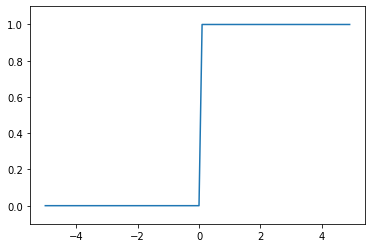

In [62]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [63]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [64]:
x = np.array([-1.0, 1.0, 2.0])

In [65]:
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [66]:
t = np.array([1.0, 2.0, 3.0])

In [67]:
1.0 + t

array([2., 3., 4.])

In [68]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

In [69]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

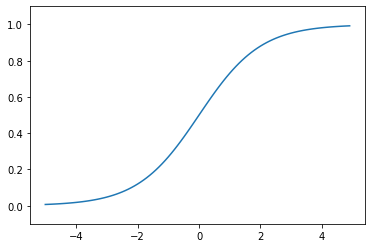

In [70]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교

In [71]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)

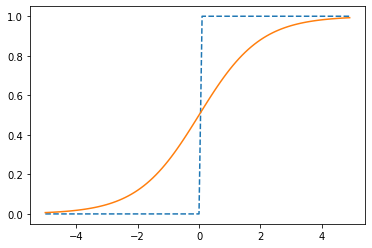

In [72]:
plt.plot(x, y1, linestyle="--")
plt.plot(x, y2)
plt.show()

두 함수의 차이는 시그모이드 함수는 출력이 연속적으로 변화하고, 계단함수는 0을 경계로 출력이 바뀐다. 두 함수의 공통점은 입력이 작을 때는 출력이 0에 가깝고 입력이 커지면 출력이 1에 가까워지는 구조라는 점이다.

### 3.2.6 비선형 함수

두 함수의 중요한 공통점은 **비선형 함수**라는 점이다. 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. 선형 함수를 이용하면 신경망의 층을 깊게 쌓는 이유가 없어지기 때문에 비선형 함수를 사용해야 한다.

선형 함수의 문제는 층을 아무리 깊게 쌓아도 은닉층이 없는 네트워크로 똑같은 기능을 할 수 있는 신경망을 만들 수 있다는 점이다. 간단한 예로 $h(x) = cx$를 활성화 함수를 사용한 경우를 보면 알 수 있다. 이 활성화 함수로 3층 네트워크를 쌓는다면 $y(x) = h(h(h(x)))$, 즉 $y(x) = c * c * c * x$가 된다. 이는 $y(x) = ax$에서 $a = c^3$로만 하면 동일한 네트워크를 만들 수 있다. 이런 식으로 동일한 네트워크를 구성하면 은닉층이 없는 네트워크로 표현하는 것이라고 할 수 있다. 따라서 층을 깊게 쌓는 의미가 없다.

### 3.2.7 ReLU 함수

최근에는 ReLU 함수를 주로 이용한다. ReLU 함수는 입력이 0을 넘으면 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수이다.

<img src="https://t1.daumcdn.net/cfile/tistory/990A6A335981FFA437">

식으로 표현하면 다음과 같다.

$$h(x) = 
\begin {cases}
x \ (x > 0) \\
0 \ (x \leq 0)
\end {cases}$$

In [73]:
def relu(x):
    return np.maximum(0, x)

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

**1차원 배열**

In [74]:
import numpy as np

In [75]:
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [76]:
np.ndim(A) # 배열의 차원 수

1

In [77]:
A.shape # 튜플을 반환하는 것 주의

(4,)

In [78]:
A.shape[0]

4

**2차원 배열**

In [79]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [80]:
np.ndim(B)

2

In [81]:
B.shape

(3, 2)

2차원 배열을 **행렬(matrix)**, 가로를 행, 세로를 열이라고 한다.

### 3.3.2 행렬의 곱

<img src="http://www.ktword.co.kr/img_data/4798_2.jpg">

In [82]:
A = np.array([[1,2], [3,4]])

In [83]:
A.shape

(2, 2)

In [84]:
B = np.array([[5,6], [7,8]])

In [85]:
B.shape

(2, 2)

In [86]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

두 행렬의 곱은 np.dot()으로 계산한다. np.dot()은 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산한다.

In [87]:
A = np.array([[1,2,3], [4,5,6]])

In [88]:
A.shape

(2, 3)

In [89]:
B = np.array([[1,2], [3,4], [5,6]])

In [90]:
B.shape

(3, 2)

In [91]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

행렬 곱은 행렬의 형상에 주의해야 한다. 첫번째 행렬의 열 수와 두번째 행렬의 행 수가 같아야 한다.

In [92]:
C = np.array([[1,2], [3,4]])

In [93]:
C.shape

(2, 2)

In [94]:
A.shape

(2, 3)

In [95]:
np.dot(A, C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

위의 오류는 행렬 A의 1번째 차원(dim 1)과 행렬 C의 0번재 차원(dim 0)의 원소 수가 다르다는 오류이다. 행렬 곱은 대응하는 차원의 원소 수가 같아야하고 계산 결과는 (첫번째 행렬의 행 수) * (두번째 행렬의 열 수)가 된다. 2차원 행렬과 1차원 행렬의 곱에서도 동일하게 적용된다.

In [96]:
A = np.array([[1,2], [3,4], [5,6]])

In [97]:
A.shape

(3, 2)

In [98]:
B = np.array([7,8])

In [99]:
B.shape

(2,)

In [100]:
np.dot(A, B)

array([23, 53, 83])

### 3.3.3 신경망에서의 행렬 곱

<img src="https://t1.daumcdn.net/cfile/tistory/992F0D3359E6FFD404?download" width=600>

In [101]:
X = np.array([1, 2])

In [102]:
X.shape

(2,)

In [103]:
W = np.array([[1,3,5], [2,4,6]])

In [104]:
W.shape

(2, 3)

In [105]:
print(W)

[[1 3 5]
 [2 4 6]]


In [106]:
Y = np.dot(X, W)

In [107]:
print(Y)

[ 5 11 17]


## 3.4 3층 신경망 구현하기

넘파이로 신경망 순방향 처리

<img src="http://blogfiles.naver.net/MjAxNzA0MTBfMjI4/MDAxNDkxODMxODI2MDI4.xAmK1be5953hGre054HWF6VWnBoVeX3NJHJLFTXKghIg.sPf0Zd5cBpgL1kZIgwEv9ssbMxtW5kl0ovzvFkoHN_Eg.PNG.htk1019/image.png">

### 3.4.1 표기법 설명 (생략)

### 3.4.2 각 층의 신호 전달 구현하기

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfMjEx/MDAxNTI4NjEzNzA2NzUw.4uqh_gqJn64Ensn63s0fY1jpbspD5oilVYSu-ejMgs8g.Di4xipmNSMo-duyfkJNJAzfkqqS72dWbGSGxzhqcHjQg.PNG.ssdyka/fig_3-17.png?type=w2">

$a_1^{(1)}$을 수식으로 나타내면 다음과 같다.

$$a_1^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1^{(1)}$$

행렬 곱으로 1층을 간소화하면 다음과 같다.

$$A^{(1)} = XW^{(1)} + B^{(1)}$$
$$A^{(1)} = (a_1^{(1)} \ a_2^{(1)} \ a_3^{(1)}), \ X = (x_1 \ x_2), \ B^{(1)} = (b_1^{(1)} \ b_2^{(1)} \ b_3^{(1)})$$
$$W^{(1)} = \begin {pmatrix}
w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}
\end{pmatrix}$$

In [108]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [109]:
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [110]:
A1 = np.dot(X, W1) + B1

활성화 함수의 처리는 다음과 같다.

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfMTUy/MDAxNTI4NjEzNzA3MTgy.iInlQtedOrR3cr83cHlHh5iBC97Rd3CAn8lsfil2pJwg.VY7Bft0dgHkae7sJ4UrgO9CchUygWMF7DhqdSlMvzm0g.PNG.ssdyka/fig_3-18.png?type=w2">

In [111]:
Z1 = sigmoid(A1)

In [112]:
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


1층에서 2층으로 가는 과정은 다음과 같다.

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfMjg4/MDAxNTI4NjEzNzA3NTY4.cwhPzaPClfzWeATMD4HaoIlB8fISmeCpZ0F0dOMNYgwg.VCGI5jJ2ZPizDF-7smAQrHaU4-lt5D7edc3wvJXctBUg.PNG.ssdyka/fig_3-19.png?type=w2">

In [113]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [114]:
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [115]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

2층에서 출력층으로의 신호 전달은 다음과 같다. 이전과 구현은 거의 같으나 이전 은닉층에서는 활성화 함수로 시그모이드를 사용한 점만 다르다.

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfMTgg/MDAxNTI4NjEzNzA3ODk1.OB5KMOlT1nVHC2soDuhlijxo7UTW6zxjoZ3MH1IiIVwg.r8GLKspRWCKdsp3xfel5Y34yJuK5K6AdmOQcBzX_iKgg.PNG.ssdyka/fig_3-20.png?type=w2">

In [116]:
# 항등 함수: 입력을 그대로 출력
def identity_function(x):
    return x

In [117]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [118]:
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

출력층의 활성화 함수는 풀고자 하는 문제에 맞게 정의해야 한다. 예를 들어 회귀에는 항등 함수, 이진 분류는 시그모이드, 다중 클래스 분류는 소프트맥스 함수를 사용한다.

### 3.4.3 구현 정리

In [119]:
# 각 층에 필요한 매개 변수를 저장하는 함수
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [120]:
# 입력 신호를 출력으로 변환하는 함수
def forward(network, x):
    W1, W2, W3 = network['W1'], network["W2"], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [121]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

기계학습 문제는 분류와 회귀로 나뉜다. 출력층에서 분류는 소프트맥스, 회귀는 항등 함수를 활성화 함수로 사용된다.

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

**항등 함수**는 입력을 그대로 출력한다.  

<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfMjg1/MDAxNTAwOTU0OTY5NTU4.ZtP7ZZ5XyOXByRFhdu8b2ZLY5RrI2HUB6f_0RJ3iHAAg.8KVM58u90RC0zVqLqx4Rb7h7QToyAJGwnufx9iQ-RBog.PNG.cjswo9207/fig_3-21.png?type=w2" width=200> 


**소프트맥스 함수**의 식은 다음과 같다.

$$y_k = \frac {exp(a_k)} {\sum_{i=1}^n exp(a_i)}$$

<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfNDIg/MDAxNTAwOTU1MDM1MzAw.sJCaYo90ZC5c7zuGAOcRZQ3Kn0mSqpcQmAAIHBRHATYg.Ebzo8fl7HX1nSNcNU52Dmu9ROy8cSdtt1ixKicUpbPAg.PNG.cjswo9207/fig_3-22.png?type=w2" width=200>

In [122]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [123]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [124]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


### 3.5.2 소프트맥스 함수 구현 시 주의점

소프트맥스에서 지수 함수는 매우 큰 값을 결과로 내보낸다. 예를 들어 $e^{1000}$는 무한대를 뜻하는 inf를 내뱉는다. 이런 값끼리 나누면 수치가 불안정해진다. 문제를 개선한 수식은 다음과 같다.

<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfMTQ2/MDAxNTAwOTU1NDg3NTgw.V4x3fV8mkgLizHKaD6hXO2NKrynSVTlvtXRHMKlo0Iwg.upe8fLUKtfw-pamp97laFk_rRPBj662XxFEE0v4_cK0g.PNG.cjswo9207/e_3.11.png?type=w2">

위의 수식은 소프트맥스에서 지수 함수를 계산할 때 어떤 정수를 더해도 결과는 바뀌지 않는다는 것을 뜻한다. 오버플로를 막기 위해 $C'$에 입력 신호 중 최댓값을 이용한다.

In [126]:
a = np.array([1010, 1000, 990])

In [127]:
np.exp(a) / np.sum(np.exp(a))

C:\Users\KJK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
C:\Users\KJK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([nan, nan, nan])

In [128]:
c = np.max(a)

In [129]:
a - c

array([  0, -10, -20])

In [130]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [131]:
# 소프트맥스 오버플로 개선 버전
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.3 소프트맥스 함수의 특징

In [132]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [133]:
np.sum(y)

1.0

소프트맥스 함수의 출력은 0 ~ 1.0의 실수이고 출력의 총합은 1이다. 이 성질 덕분에 소프트맥스 함수의 출력을 확률로 해석할 수 있다.

또한 소프트맥스 함수를 적용해도 각 원소에 대소 관계는 변하지 않는다. 분류 문제에서 가장 큰 출력을 내는 클래스만 인식하는 경우가 많은데 소프트맥스 함수를 적용해도 위치는 변하지 않는다. 현업에서는 지수 함수의 계산 비용이 높기 때문에 소프트맥스 함수를 생략한다(학습 단계에서는 소프트맥스를 사용하고 추론 단계에서는 소프트맥스를 생략한다는 의미).

### 3.5.4 출력층의 뉴런 수 정하기

출력층의 뉴런 수는 풀려고 하는 문제에 맞게 설정해야 한다. 분류에서는 분류하려는 클래스의 수로 하는 것이 일반적이다.

## 3.6 손글씨 숫자 인식

**순전파(forward propagation)**

### 3.6.1 MNIST 데이터셋

<img src="https://www.researchgate.net/profile/Steven_Young11/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png" width=300>

- 0부터 9까지의 숫자 이미지
- 훈련 이미지: 60,000장
- 시험 이미지: 10,000장
- 28 X 28 회색조 이미지(1채널)
- 픽셀 0 ~ 255
- 각 이미지에 숫자 레이블링

In [134]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [135]:
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [136]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


**load_mnist**
- MNIST 데이터를 (훈련이미지, 훈련 레이블), (시험 이미지, 시험 레이블) 형식으로 반환
- parameters
    - normalize: 입력 이미지의 픽셀 값을 0.0 ~ 1.0 사이의 값으로 정규화할지 정하는 parameter
    - flatten: 입력 이미지를 1차원 배열로 만들지 정하는 parameter
    - one_hot_label: 레이블을 원-핫 인코딩 형태로 저장할지 정하는 parameter

**MNIST 이미지 출력**

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

In [138]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [139]:
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)

In [140]:
img = x_train[0]
label = y_train[0]
print(label)

5


In [141]:
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

(784,)
(28, 28)


In [144]:
img_show(img)

### 3.6.2 신경망의 추론 처리

- 입력층 뉴런: 784개 (28X28)
- 출력층 뉴런: 10개 (0~9)
- 은닉층: 2개
    - 1층: 50개의 뉴런 (임의의 값)
    - 2층: 100개의 뉴런 (임의의 값)

In [151]:
import pickle

In [152]:
def get_data():
    (x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    
    return x_test, y_test

In [153]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

In [154]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [156]:
x, t = get_data()
network = init_network()

In [157]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

In [158]:
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


**추론 과정**
1. MNIST 데이터셋을 받고 네트워크 생성
2. x에 저장된 이미지를 하나씩 꺼내 predict로 분류
3. 예측 결과를 정답 레이블과 비교하면서 정확도 계산

신경망에 입력 데이터를 넣어주기 전에 입력 데이터를 특정하게 변환해줘야 하는데 이를 **전처리(pre-processing)**라고 하고 이 예제에서는 전처리 중 하나인 **정규화(normalization)**을 해주었다. 

### 3.6.3 배치 처리

In [159]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [160]:
x.shape

(10000, 784)

In [161]:
x[0].shape

(784,)

In [162]:
W1.shape

(784, 50)

In [163]:
W2.shape

(50, 100)

In [164]:
W3.shape

(100, 10)

- 이미지 데이터 1장 입력할 때
<img src="https://t1.daumcdn.net/cfile/tistory/27BA32335977F58821" width=400>

- 이미지 데이터 100장 입력할 때
<img src="https://t1.daumcdn.net/cfile/tistory/272138335977F5892C" width=400>

이미지 데이터를 100장 묶어서 입력하는 것과 같이 하나로 묶은 입력 데이터를 **배치(batch)**라고 한다.

배치의 이점
- 이미지 1장당 처리 시간 줄여줌
- 이유
    - 수치 계산 라이브러리가 큰 배열 효율적 처리
    - 버스에 주는 부하를 줄여 데이터 전송 병목 현상 완화(데이터 읽는 횟수 줄어, 순수 계산 수행 비율 높아짐)

In [165]:
x, t = get_data()
network = init_network()

In [166]:
batch_size = 100
accuracy_cnt = 0

In [167]:
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

In [168]:
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


처리 과정
1. range() 함수를 이용해서 x[i:i+batch_size]의 입력 데이터를 묶는다. 여기서 batch_size는 100이므로 x[0:100], x[100,200], ...과 같이 된다.
2. argmax()로 최댓값의 인덱스를 가져온다. axis=1 주의.
3. 배치 단위로 분류한 결과를 실제 label과 비교하면서 정확도 계산